#### 导入数据

In [1]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')
# 在Jupyter上画图
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
# 读取CSV文件为一个DataFrame对象
df = pd.read_csv('dataset\Aquifer\Aquifer_Auser.csv')

data_info = df.info()
data_description = df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

#### 数据预处理  


##### 数据可视化
数据

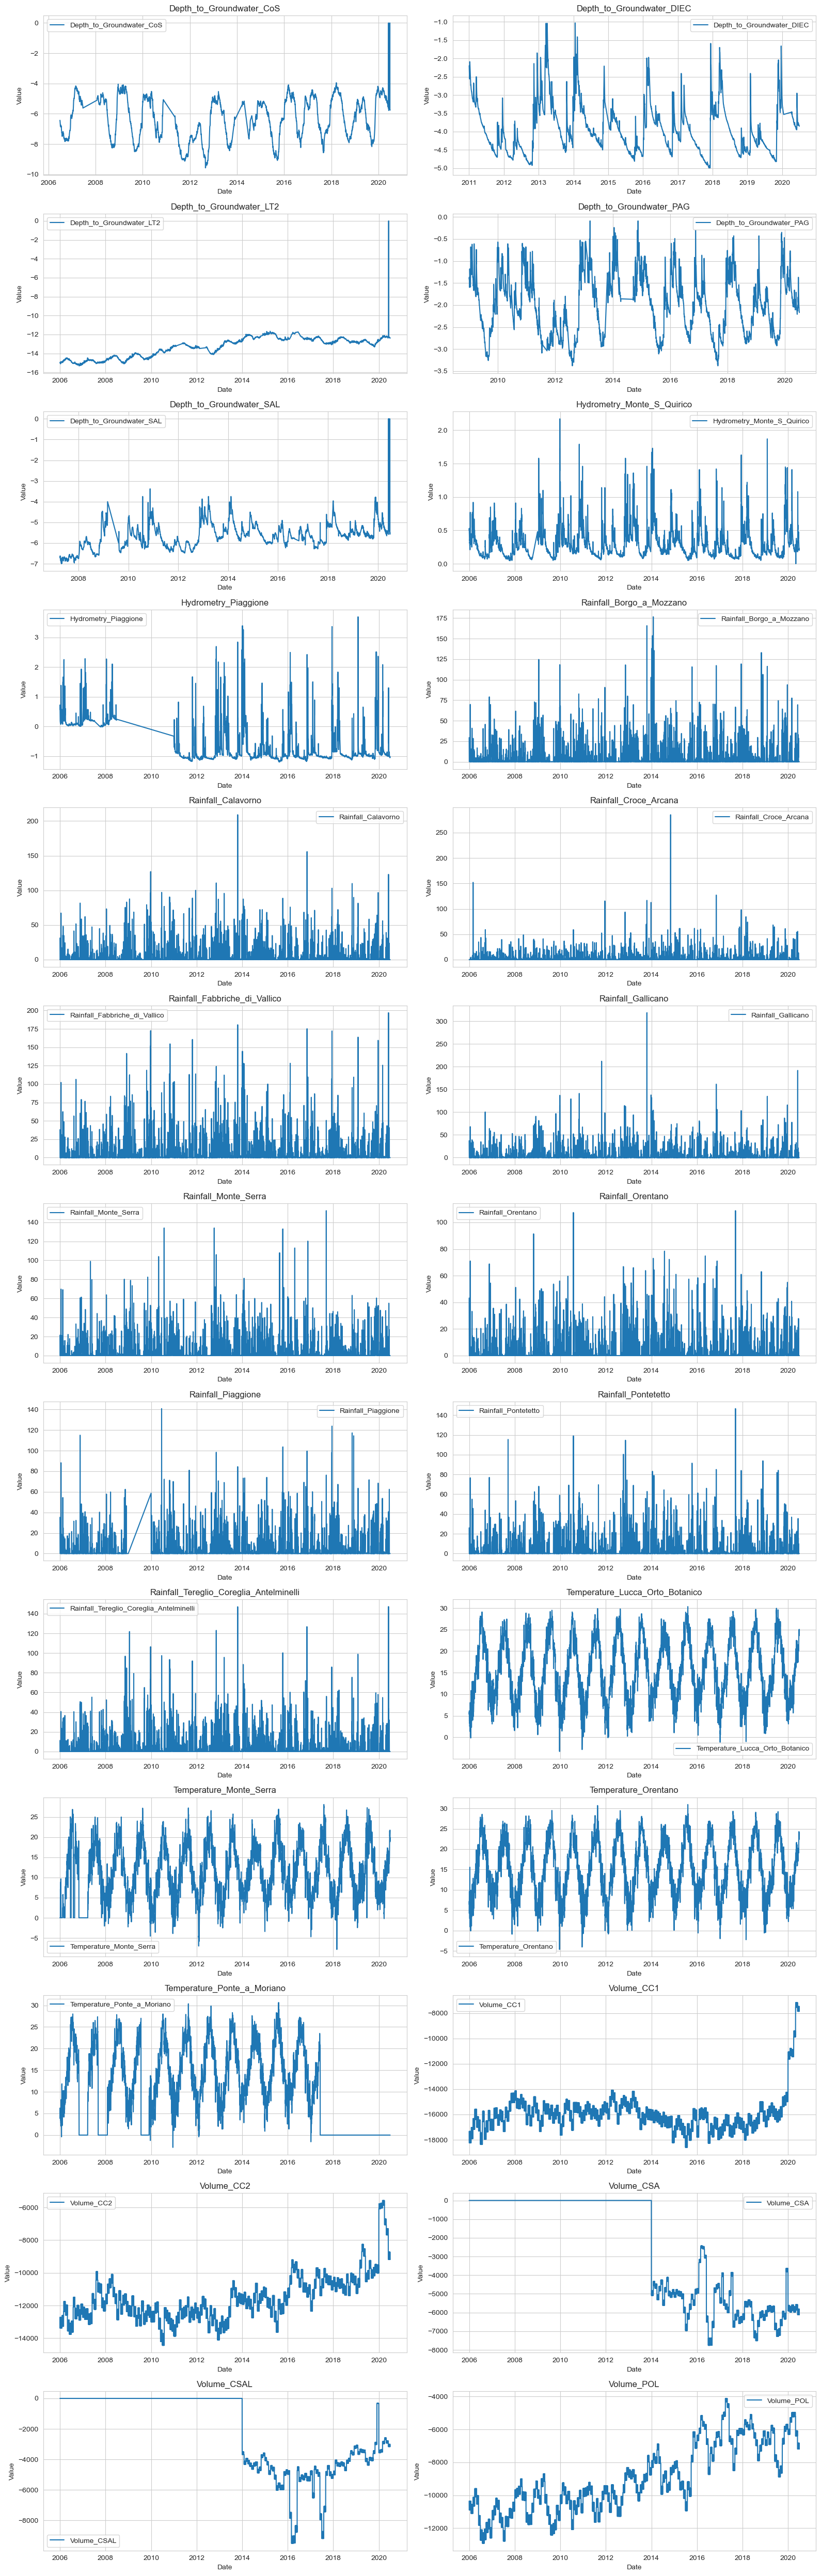

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取CSV文件为一个DataFrame对象
df = pd.read_csv('dataset\Aquifer\Aquifer_Auser.csv')

# 设置日期列为索引，去除2006-01-01之前的数据
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df = df['2006-01-01':]

# 获取除了标签列之外的所有数据列
data_columns = df.columns.difference(['Date'])
# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的折线图
for column in data_columns:
    plt.subplot(13, 2, data_columns.get_loc(column) + 1)
    sns.lineplot(data=df, x=df.index, y=column, label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()


我们可以看到，首先需要处理的是缺失值问题  

Rainfall_Gallicano                            0
Rainfall_Pontetetto                           0
Rainfall_Monte_Serra                          6
Rainfall_Orentano                             0
Rainfall_Borgo_a_Mozzano                      0
Rainfall_Piaggione                          365
Rainfall_Calavorno                            0
Rainfall_Croce_Arcana                         0
Rainfall_Tereglio_Coreglia_Antelminelli       0
Rainfall_Fabbriche_di_Vallico                 0
Depth_to_Groundwater_LT2                    493
Depth_to_Groundwater_SAL                    750
Depth_to_Groundwater_PAG                   1488
Depth_to_Groundwater_CoS                    980
Depth_to_Groundwater_DIEC                  2025
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                                    0
Volume_CC1                              

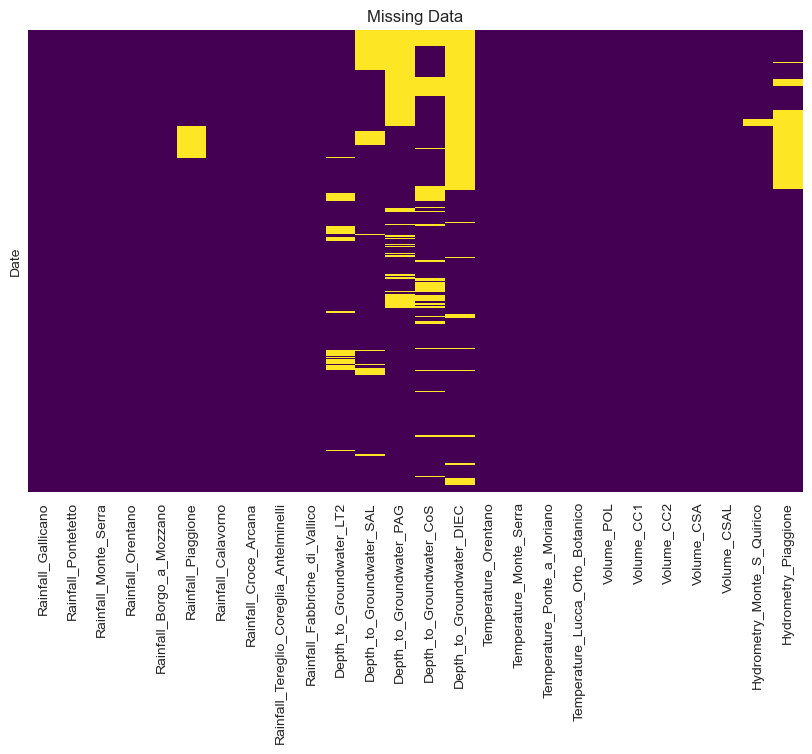

In [4]:
# 检测缺失值
missing_data = df.isnull().sum()

# 打印缺失值情况
print(missing_data)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data')
plt.show()


先对缺失值做基本的线性填充  将异常值处理

In [5]:
# 列名列表
columns_to_replace_zero = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
                            'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC', 'Temperature_Orentano']

# 将值为0的数据替换为NaN
df[columns_to_replace_zero] = df[columns_to_replace_zero].replace(0, float('nan'))


# 使用线性填充来填补缺失值
df = df.interpolate(method='linear')

# 查看填充后的DataFrame的缺失值情况
missing_data_filled = df.isnull().sum()

# 打印填充后的缺失值情况
print(missing_data_filled)

Rainfall_Gallicano                            0
Rainfall_Pontetetto                           0
Rainfall_Monte_Serra                          0
Rainfall_Orentano                             0
Rainfall_Borgo_a_Mozzano                      0
Rainfall_Piaggione                            0
Rainfall_Calavorno                            0
Rainfall_Croce_Arcana                         0
Rainfall_Tereglio_Coreglia_Antelminelli       0
Rainfall_Fabbriche_di_Vallico                 0
Depth_to_Groundwater_LT2                      0
Depth_to_Groundwater_SAL                    460
Depth_to_Groundwater_PAG                   1096
Depth_to_Groundwater_CoS                    179
Depth_to_Groundwater_DIEC                  1827
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                                    0
Volume_CC1                              

扔弃掉标签中仍然缺失的行

In [6]:
# 删除仍然具有缺失值的行
df.dropna(subset=columns_to_replace_zero, inplace=True)

# 查看填充后的DataFrame的缺失值情况
missing_data = df.isnull().sum()

# 打印填充后的缺失值情况
print(missing_data)

Rainfall_Gallicano                         0
Rainfall_Pontetetto                        0
Rainfall_Monte_Serra                       0
Rainfall_Orentano                          0
Rainfall_Borgo_a_Mozzano                   0
Rainfall_Piaggione                         0
Rainfall_Calavorno                         0
Rainfall_Croce_Arcana                      0
Rainfall_Tereglio_Coreglia_Antelminelli    0
Rainfall_Fabbriche_di_Vallico              0
Depth_to_Groundwater_LT2                   0
Depth_to_Groundwater_SAL                   0
Depth_to_Groundwater_PAG                   0
Depth_to_Groundwater_CoS                   0
Depth_to_Groundwater_DIEC                  0
Temperature_Orentano                       0
Temperature_Monte_Serra                    0
Temperature_Ponte_a_Moriano                0
Temperature_Lucca_Orto_Botanico            0
Volume_POL                                 0
Volume_CC1                                 0
Volume_CC2                                 0
Volume_CSA

看看具体效果  
结果发现'Volume_CSA', 'Volume_CSAL', 'Temperature_Ponte_a_Moriano'三行某些时间段的数据缺失异常

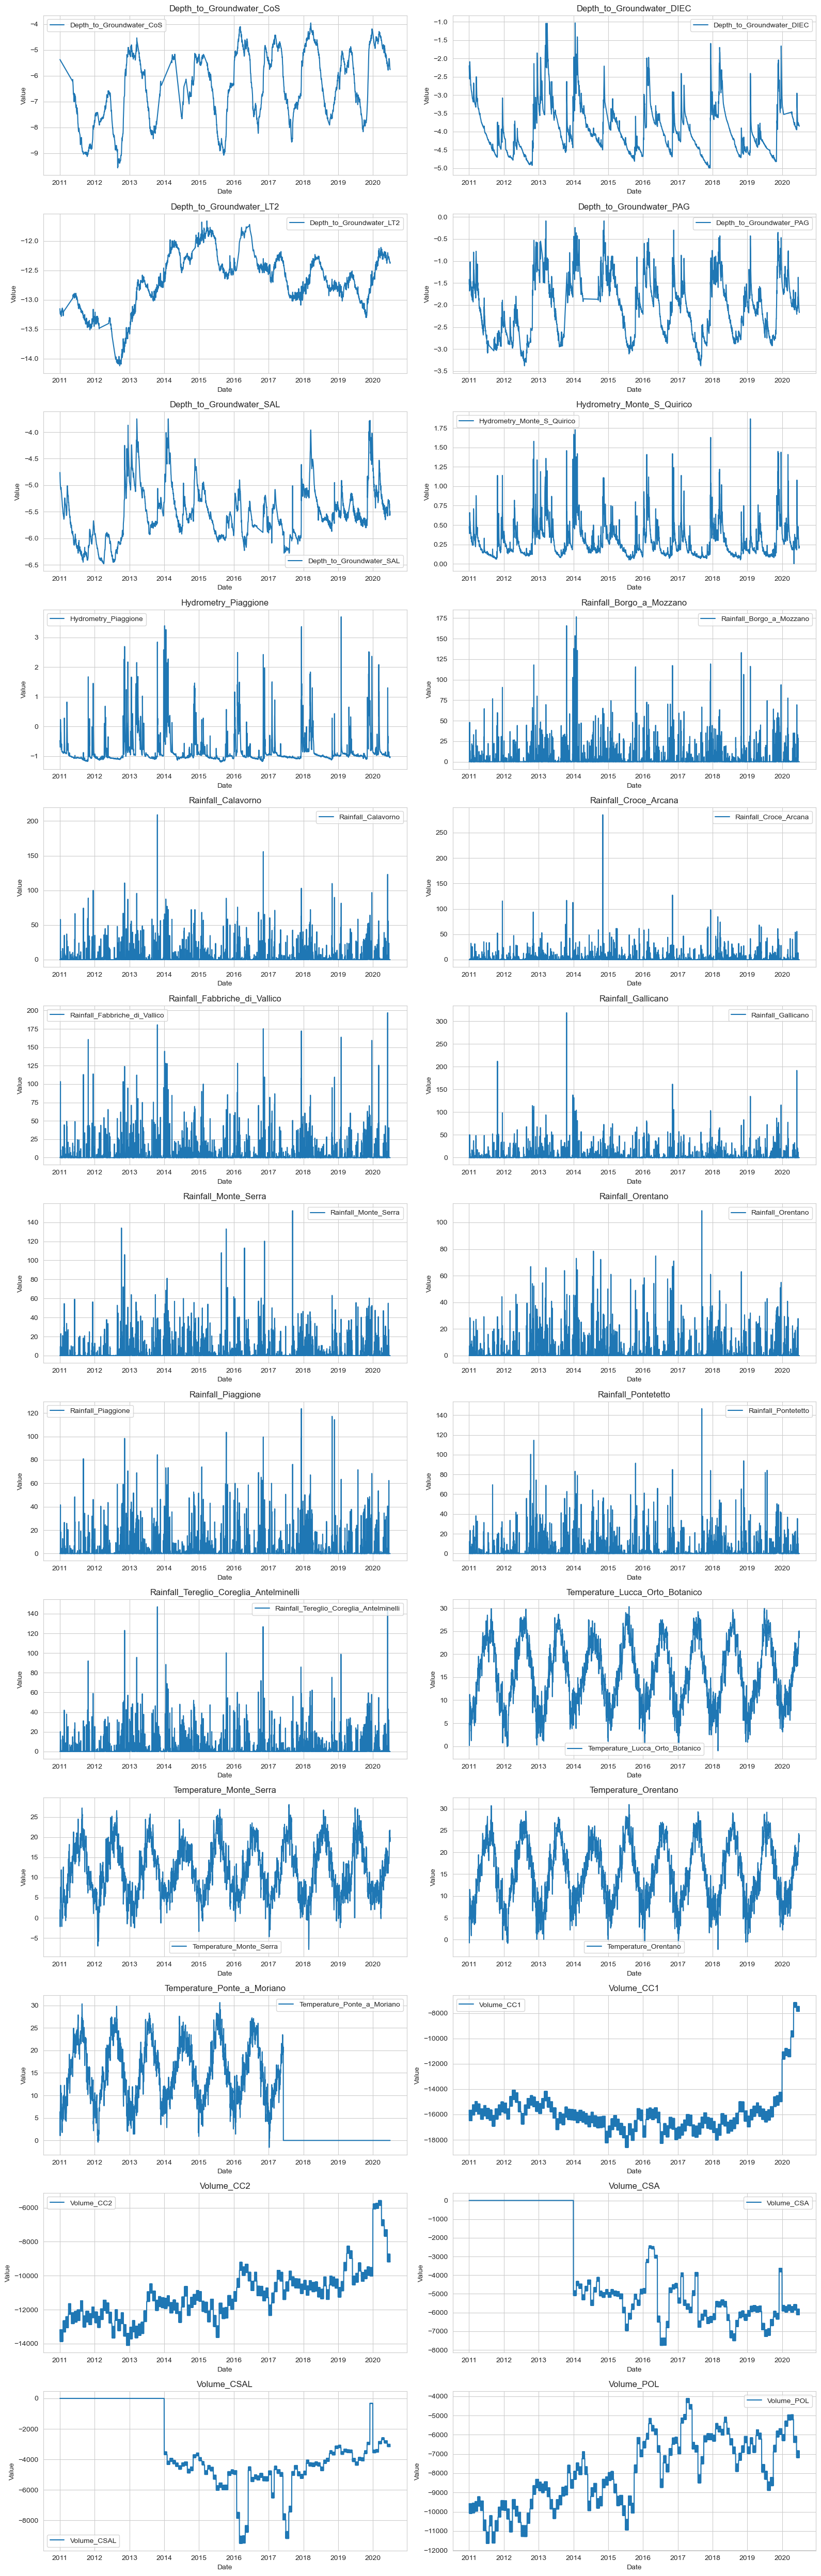

In [7]:
# 获取除了标签列之外的所有数据列
data_columns = df.columns.difference(['Date'])
# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的折线图
for column in data_columns:
    plt.subplot(13, 2, data_columns.get_loc(column) + 1)
    sns.lineplot(data=df, x=df.index, y=column, label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()

使用KNN填充 'Volume_CSA', 'Volume_CSAL', 'Temperature_Ponte_a_Moriano' 这三列数据

In [8]:
import pandas as pd
from sklearn.impute import KNNImputer
columns_to_check = ['Volume_CSA', 'Volume_CSAL', 'Temperature_Ponte_a_Moriano']
for column in columns_to_check:
    df[column] = df[column].replace(0, float('nan'))


imputer = KNNImputer(n_neighbors=5)
# 填充缺失值
df_filled = imputer.fit_transform(df)
df_filled = pd.DataFrame(df_filled, columns=df.columns)
df =df_filled

数据预处理基本完成

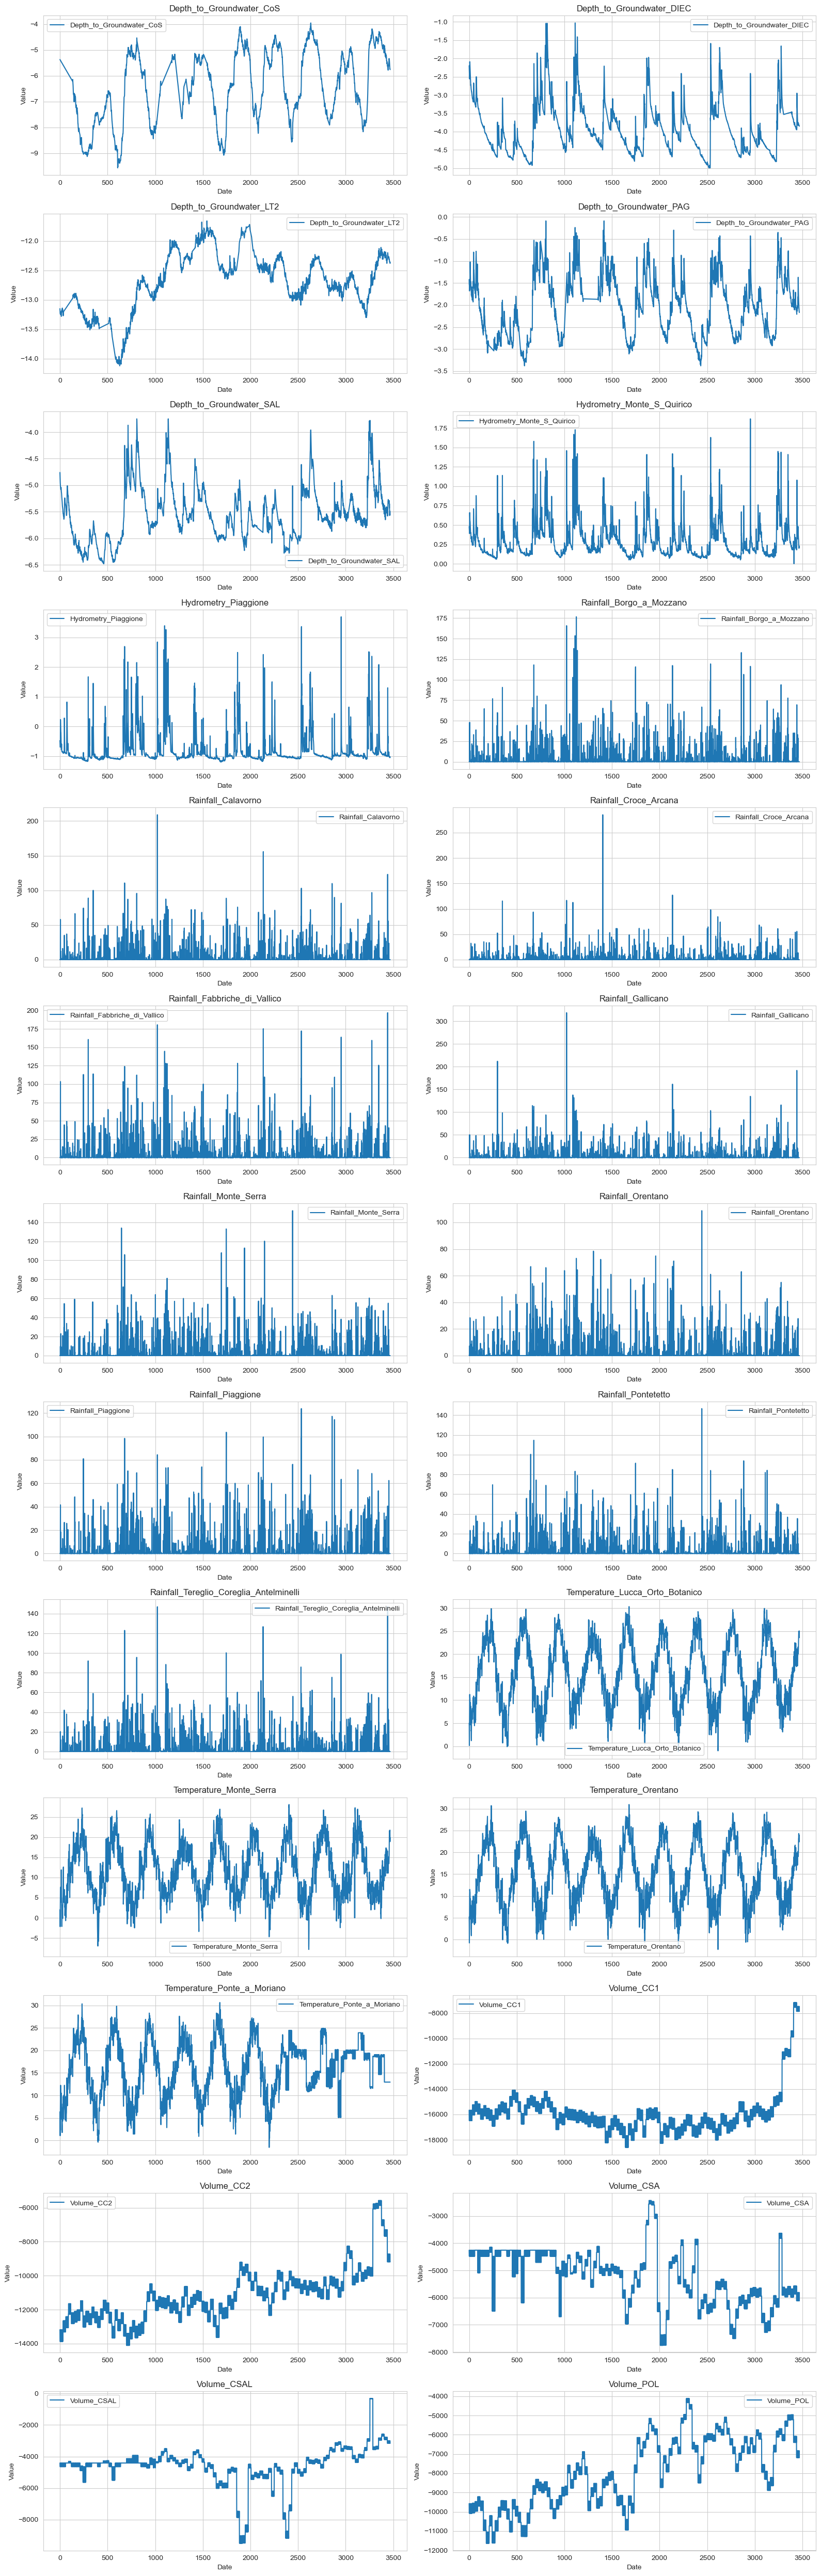

In [13]:
# 获取除了标签列之外的所有数据列
data_columns = df.columns.difference(['Date'])  # 使用填充后的 DataFrame

# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的折线图
for column in data_columns:
    plt.subplot(13, 2, data_columns.get_loc(column) + 1)
    sns.lineplot(data=df, x=df.index, y=column, label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()

让我们看看它的箱线图

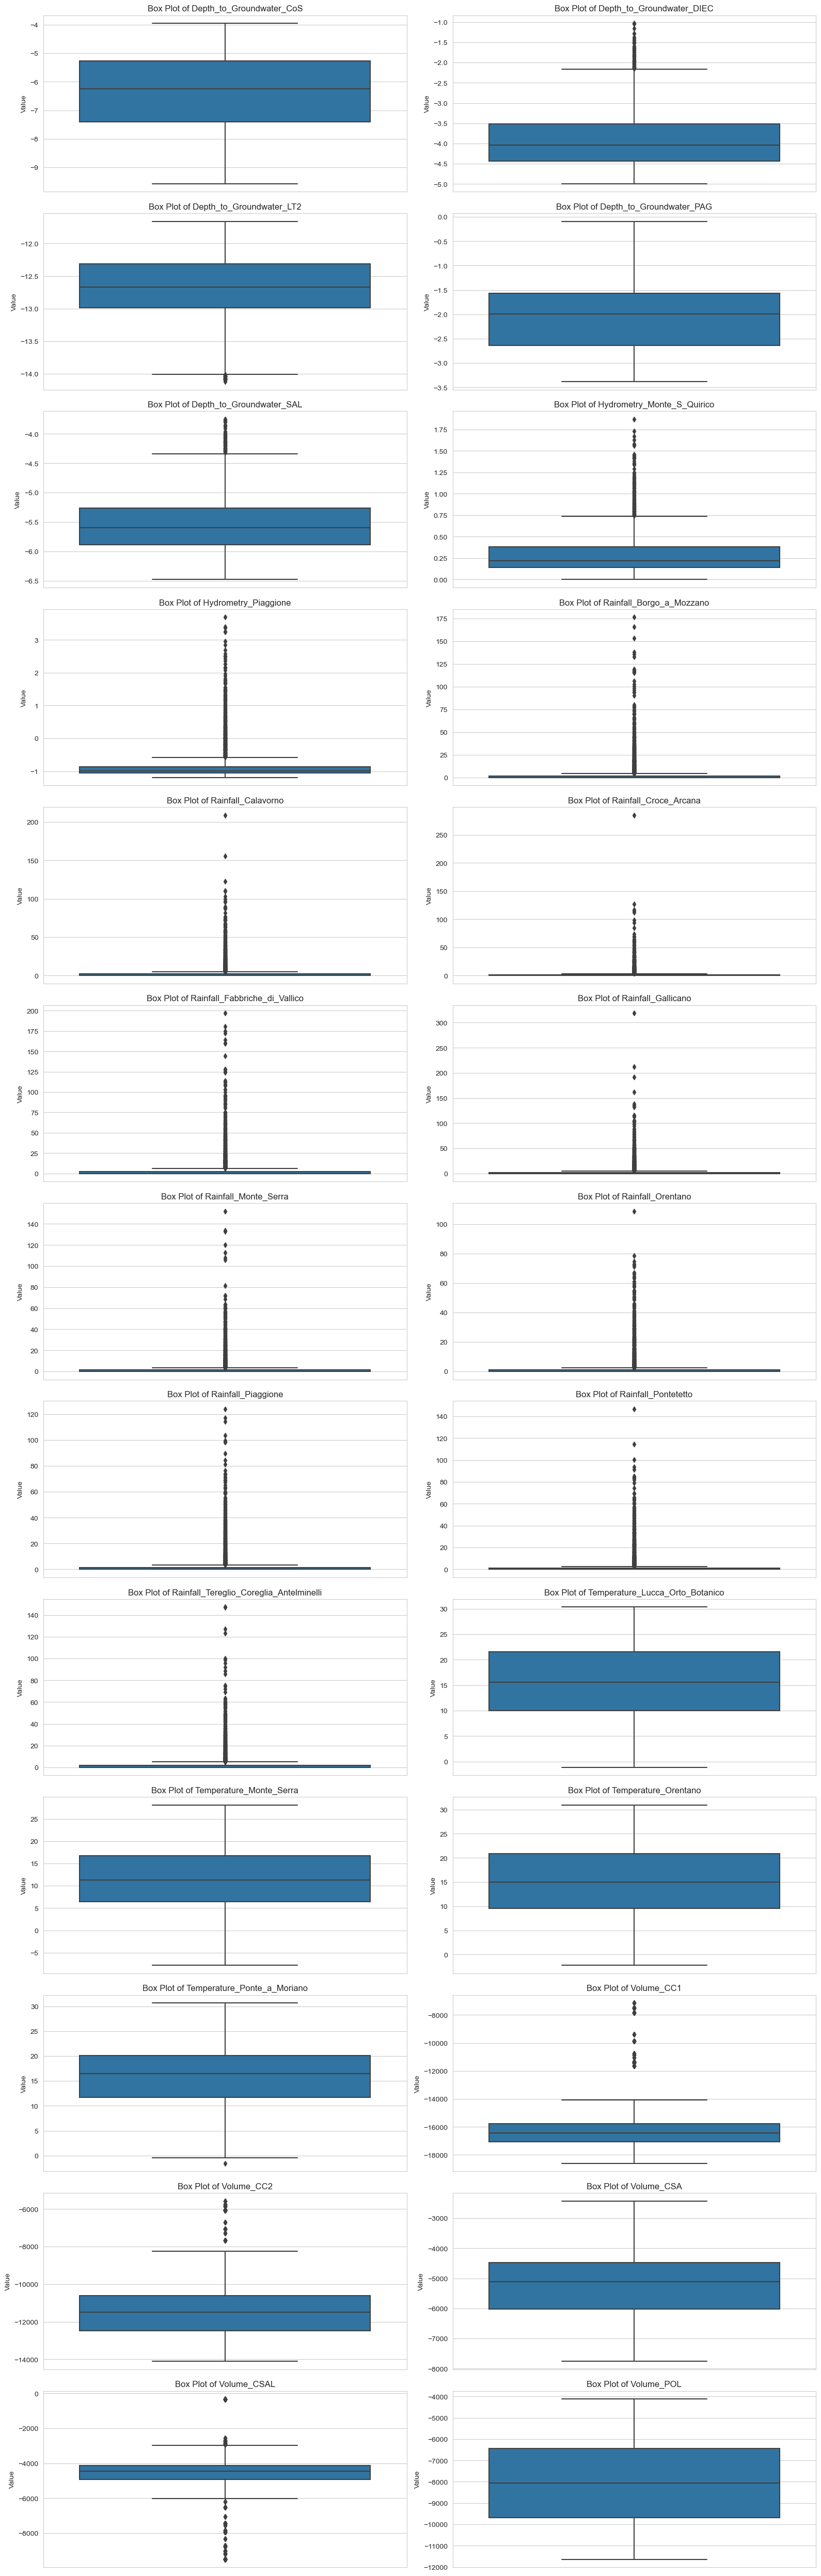

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 获取除了标签列之外的所有数据列
data_columns = df.columns.difference(['Date'])  # 使用填充后的 DataFrame

# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的箱线图
for i, column in enumerate(data_columns):
    plt.subplot(13, 2, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()


#### 模型搭建

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 假设 df 包含了所有的数据

# 选择目标列
target_columns = ['Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_LT2']

# 选择特征列，即除了目标列以外的所有列
features = [col for col in df.columns if col not in target_columns]

X = df[features].values
y = df[target_columns].values

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)


In [16]:
import numpy as np

# 假设你的X_train和y_train的形状为 (samples, features)，其中samples是样本数，features是特征数
# 假设time_steps为7
time_steps = 7  # 时间窗口大小设置为一周的数据点数
# 定义一个函数来将数据按时间窗口大小切割成序列
def create_sequences(X, y, time_steps):
    X_sequences, y_sequences = [], []
    for i in range(len(X) - time_steps):
        X_sequences.append(X[i:i+time_steps])
        y_sequences.append(y[i+time_steps])
    return np.array(X_sequences), np.array(y_sequences)

# 调用函数来生成序列数据
X_sequences, y_sequences = create_sequences(X, y, time_steps)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=0)
# 检查数据形状
print(X_train.shape)  # 应该为 (samples, time_steps, features)

# 现在你可以使用 X_train 和 y_train 来训练模型

(2768, 7, 23)


In [17]:
from tensorflow.keras.layers import Bidirectional, LSTM

# 创建双向循环神经网络模型

LSTMmodel = Sequential()
LSTMmodel.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(time_steps, 23)))
LSTMmodel.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))
LSTMmodel.add(Bidirectional(LSTM(16, activation='relu')))
LSTMmodel.add(Dense(len(target_columns)))

# 编译模型
LSTMmodel.compile(optimizer='adam', loss='mean_squared_error')


In [18]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error



# 训练模型并添加回调函数
LSTMmodel.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2)

# 在测试集上评估模型
loss = LSTMmodel.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")




Epoch 1/300
70/70 [==============================] - 18s 46ms/step - loss: 0.4223 - val_loss: 0.1753
Epoch 2/300
70/70 [==============================] - 1s 18ms/step - loss: 0.1167 - val_loss: 0.0842
Epoch 3/300
70/70 [==============================] - 1s 19ms/step - loss: 0.0761 - val_loss: 0.0689
Epoch 4/300
70/70 [==============================] - 1s 18ms/step - loss: 0.0579 - val_loss: 0.0620
Epoch 5/300
70/70 [==============================] - 1s 19ms/step - loss: 0.0515 - val_loss: 0.0496
Epoch 6/300
70/70 [==============================] - 1s 18ms/step - loss: 0.0419 - val_loss: 0.0439
Epoch 7/300
70/70 [==============================] - 1s 18ms/step - loss: 0.0364 - val_loss: 0.0399
Epoch 8/300
70/70 [==============================] - 1s 18ms/step - loss: 0.0310 - val_loss: 0.0363
Epoch 9/300
70/70 [==============================] - 1s 18ms/step - loss: 0.0297 - val_loss: 0.0323
Epoch 10/300
70/70 [==============================] - 1s 18ms/step - loss: 0.0268 - val_loss: 0.033

In [19]:
lstm_predictions = LSTMmodel.predict(X_test)


22/22 [==============================] - 1s 3ms/step


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Reshape data for linear regression (flatten the sequence dimension)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


# 创建线性回归模型（针对每个目标列）
models = [LinearRegression() for _ in range(y_train.shape[1])]

# 训练模型
for i, model in enumerate(models):
    model.fit(X_train_flat, y_train[:, i])

# 在测试集上进行预测
predictions = [model.predict(X_test_flat) for model in models]

# 计算每个目标列的均方误差（MSE）作为评估指标
mse_scores = [mean_squared_error(y_test[:, i], pred) for i, pred in enumerate(predictions)]

# 输出每个目标列的MSE
for i, target_column in enumerate(target_columns):
    print(f"MSE for {target_column}: {mse_scores[i]}")



MSE for Depth_to_Groundwater_SAL: 0.08852858086019542
MSE for Depth_to_Groundwater_CoS: 0.08446822065737351
MSE for Depth_to_Groundwater_LT2: 0.36019775946156446


In [21]:
true_values= y_test
linear_predictions = predictions

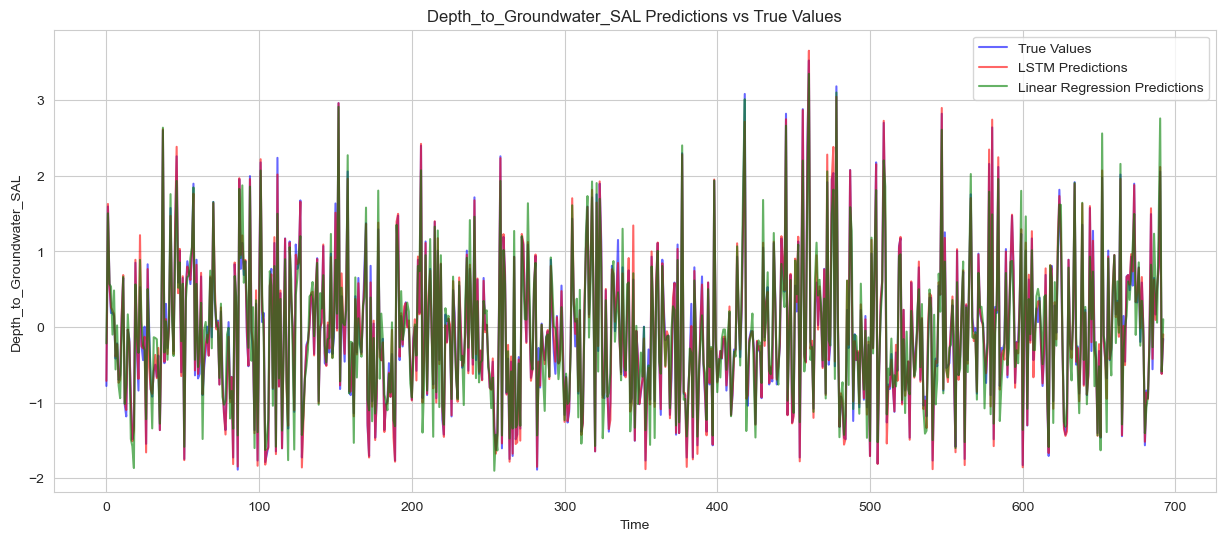

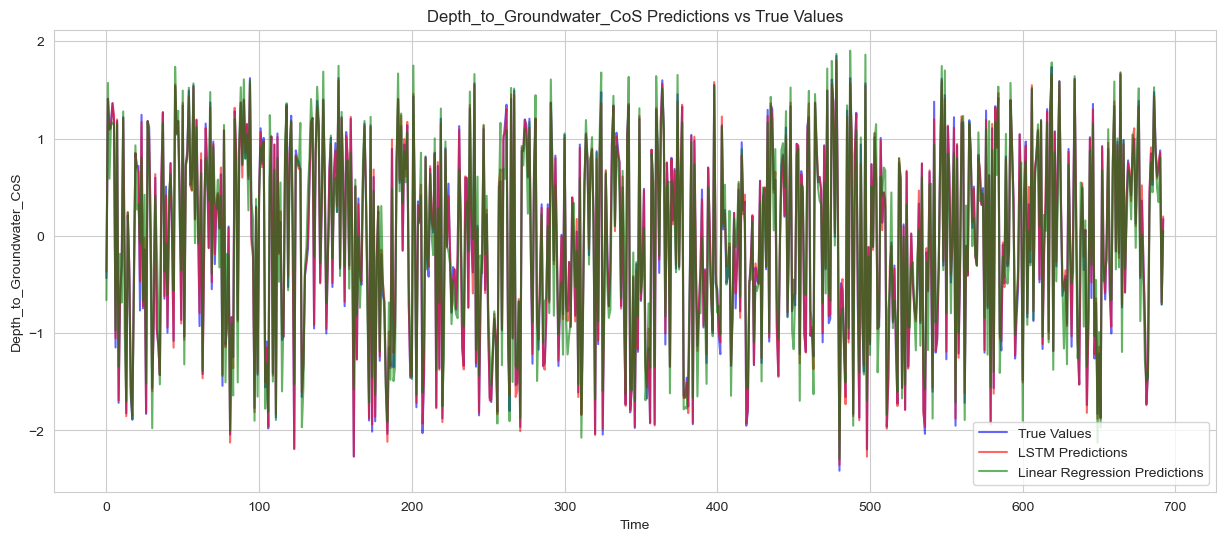

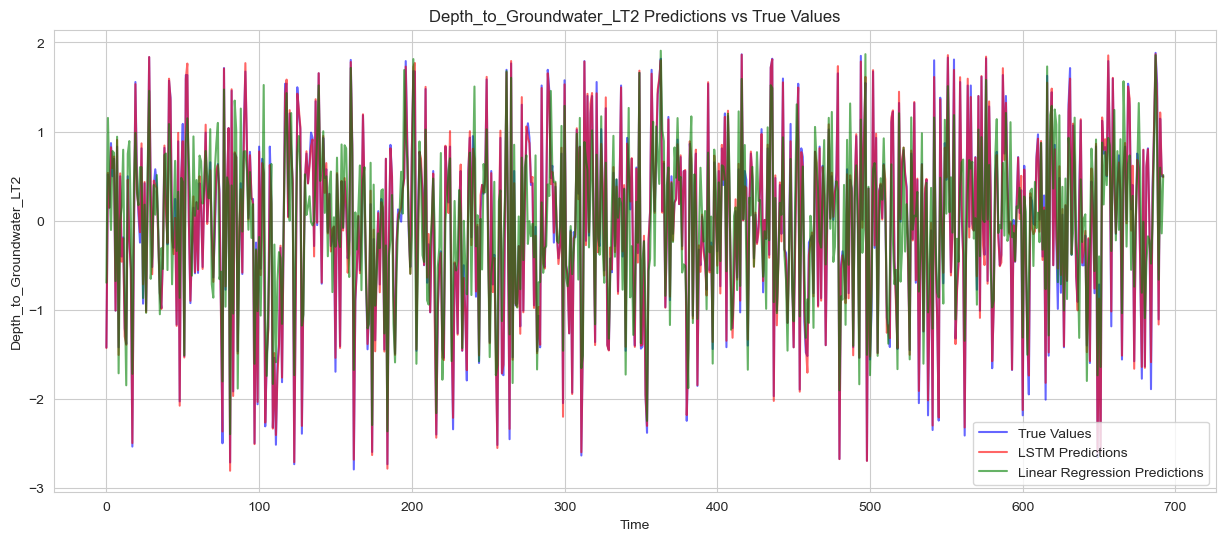

In [22]:
import matplotlib.pyplot as plt

# 为每一列数据生成图表
for i, target_column in enumerate(target_columns):
    # 获取真实值、LSTM模型预测值和线性回归模型预测值
    true_values = y_test[:, i]
    lstm_predictions_column = lstm_predictions[:, i]  # 获取第 i 列的LSTM预测值
    linear_predictions_column = linear_predictions[i]  # 获取第 i 列的线性回归预测值

    # 创建时间序列
    time_series = range(len(true_values))

    # 创建一个新的图表
    plt.figure(figsize=(15, 6))

    # 绘制真实值
    plt.plot(time_series, true_values, label='True Values', color='blue', alpha=0.6)

    # 绘制LSTM模型预测值
    plt.plot(time_series, lstm_predictions_column, label='LSTM Predictions', color='red', alpha=0.6)

    # 绘制线性回归模型预测值
    plt.plot(time_series, linear_predictions_column, label='Linear Regression Predictions', color='green', alpha=0.6)

    # 设置标题和标签
    plt.title(f'{target_column} Predictions vs True Values')
    plt.xlabel('Time')
    plt.ylabel(target_column)

    # 添加图例
    plt.legend()

    # 显示图表
    plt.show()
